In [1]:
import pandas as pd
#data_all = pd.read_excel("Habit_Tracker_Analysis.xlsx", sheet_name=None, parse_dates=[1])
data_all = pd.read_excel("Habit_Tracker_Analysis.xlsx", sheet_name=None, index_col = '# Day')
wkb = data_all['Sheet1']
#wkb.drop(columns = ['Unnamed: 0'],inplace = True)
wkb.head(10)
wkb.describe()
wkb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[ns]
 1   Sleep (hrs)        180 non-null    int64         
 2   Workout            180 non-null    object        
 3   Meditated          180 non-null    object        
 4   Journaled          180 non-null    object        
 5   Screen Time (hrs)  180 non-null    int64         
 6   Sugar Consumption  180 non-null    object        
 7   Mood (1–5)         180 non-null    float64       
 8   Notes              42 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 14.1+ KB


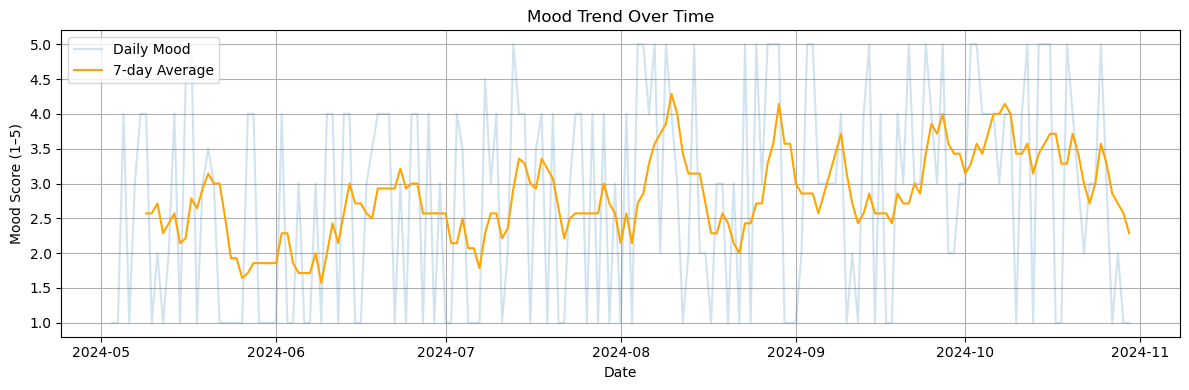

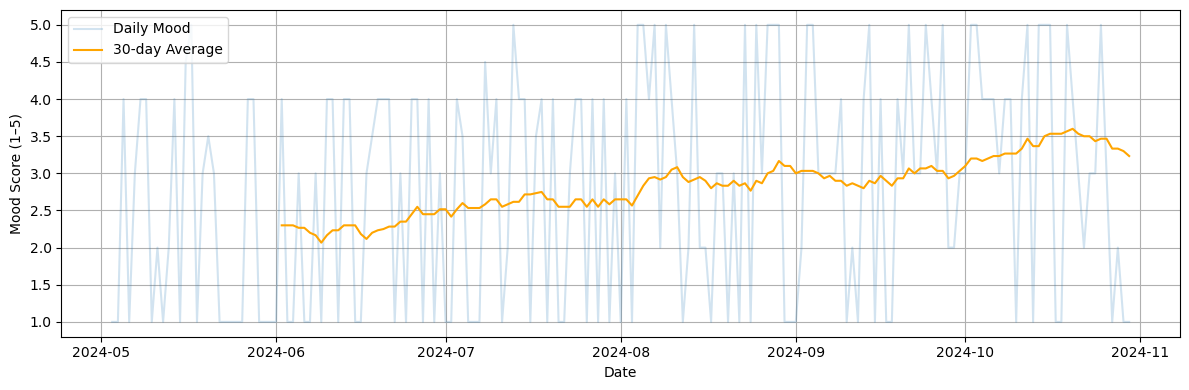

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Sort by date
wkb = wkb.sort_values('Date')

# Step 2: Create a rolling average column (7-day window)
wkb['Mood_Rolling'] = wkb['Mood (1–5)'].rolling(window=7, center=False).mean()

# Step 3: Plot
plt.figure(figsize=(12,4))
sns.lineplot(data=wkb, x='Date', y='Mood (1–5)', label='Daily Mood', alpha=0.2)
sns.lineplot(data=wkb, x='Date', y='Mood_Rolling', label='7-day Average', color='orange')

plt.title('Mood Trend Over Time')
plt.ylabel('Mood Score (1–5)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Create a rolling average column (30-day window)
wkb['Mood_Rolling'] = wkb['Mood (1–5)'].rolling(window=30, center=False).mean()

# Step 3: Plot
plt.figure(figsize=(12,4))
sns.lineplot(data=wkb, x='Date', y='Mood (1–5)', label='Daily Mood', alpha=0.2) #"alpha" refers to the transparency or opacity of the plotted elements
sns.lineplot(data=wkb, x='Date', y='Mood_Rolling', label='30-day Average', color='orange')

plt.ylabel('Mood Score (1–5)')
#plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

_**HABIT STREAK ANALYSIS**_

In [17]:
import itertools

#Convert habit columns to binary if they aren't already
wkb['Workout_Streak']=wkb['Workout'].apply(lambda x: 1 if x=="Yes" else 0)
wkb['Meditation_Streak']=wkb['Meditated'].apply(lambda x: 1 if x=="Yes" else 0)
wkb['Journal_Streak']=wkb['Journaled'].apply(lambda x: 1 if x == "Yes" else 0)
wkb['NoSugar_Streak']=wkb['Sugar Consumption'].apply(lambda x: 0 if x in ["Yes", "Ate some sweets"] else 1)
wkb['ScreenTime_Streak']=wkb['Screen Time (hrs)'].apply(lambda x: 1 if x<=3 else 0)

#DEFINING A FUNCTION - counting consecutive Yes/ 1's (FOR loops could work too)
def longest_streak(series): 
    return max((sum(1 for _ in group) for val, group in itertools.groupby(series) if val == 1),default = 0) 

def habit_freq(series):
    return series.sum() 
    
#itertools.groupby groups consecutive values in the form val:list of consecutive 'val'
#If there are no 1s at all, default = 0 returns 0 (prevents ValueError from max() on an empty sequence)

#CREATING A MONTH WISE COLUMN _ FOR MONTH-WISE STREAKS
wkb['Month'] = wkb['Date'].dt.to_period('M')

#INCORRECT APPROACH - Only records the streak for the last month
streaks ={}
for month,month_df in wkb.groupby('Month'):
    #print(month, "AND \n", month_df)
    streaks['Workout'] = longest_streak(month_df['Workout_Streak'])
    streaks['Meditated'] =  longest_streak(month_df['Meditation_Streak'])
    streaks['Journaled'] = longest_streak(month_df['Journal_Streak'])
    streaks['No Sugar']= longest_streak(month_df['NoSugar_Streak'])

In [22]:
#CORRECT APPROACH - Longest Streak
streaks ={}

print("Monthly Habit - Longest Streak:")
for month,month_df in wkb.groupby('Month'):
    #print(month, "AND \n", month_df)
    streaks[str(month)] = {
        'Workout': longest_streak(month_df['Workout_Streak']),
        'Meditated': longest_streak(month_df['Meditation_Streak']),
        'Journaled': longest_streak(month_df['Journal_Streak']),
        'No Sugar': longest_streak(month_df['NoSugar_Streak'])}
        #'Screen Time': longest_streak(month_df['ScreenTime'])
streaks

Monthly Habit - Longest Streak:


{'2024-05': {'Workout': 6, 'Meditated': 3, 'Journaled': 3, 'No Sugar': 2},
 '2024-06': {'Workout': 8, 'Meditated': 5, 'Journaled': 4, 'No Sugar': 2},
 '2024-07': {'Workout': 3, 'Meditated': 4, 'Journaled': 4, 'No Sugar': 3},
 '2024-08': {'Workout': 4, 'Meditated': 6, 'Journaled': 4, 'No Sugar': 5},
 '2024-09': {'Workout': 3, 'Meditated': 3, 'Journaled': 5, 'No Sugar': 3},
 '2024-10': {'Workout': 2, 'Meditated': 3, 'Journaled': 3, 'No Sugar': 3}}

In [21]:
#CORRECT APPROACH - Frequency
frequency = {}

print("Monthly Habit - Frequency:")
for month,month_df in wkb.groupby('Month'):
    #print(month, "AND \n", month_df)
   frequency[str(month)] = {
        'Workout': habit_freq(month_df['Workout_Streak']),
        'Meditated': habit_freq(month_df['Meditation_Streak']),
        'Journaled': habit_freq(month_df['Journal_Streak']),
        'No Sugar': habit_freq(month_df['NoSugar_Streak'])}
        #'Screen Time': longest_streak(month_df['ScreenTime'])

frequency

Monthly Habit - Frequency:


{'2024-05': {'Workout': 14, 'Meditated': 12, 'Journaled': 7, 'No Sugar': 12},
 '2024-06': {'Workout': 20, 'Meditated': 17, 'Journaled': 15, 'No Sugar': 10},
 '2024-07': {'Workout': 19, 'Meditated': 18, 'Journaled': 18, 'No Sugar': 8},
 '2024-08': {'Workout': 17, 'Meditated': 15, 'Journaled': 14, 'No Sugar': 17},
 '2024-09': {'Workout': 14, 'Meditated': 16, 'Journaled': 16, 'No Sugar': 16},
 '2024-10': {'Workout': 11, 'Meditated': 14, 'Journaled': 10, 'No Sugar': 13}}

_**CORRELATION BETWEEN HABITS AND MOOD - KEY DRIVERS**_

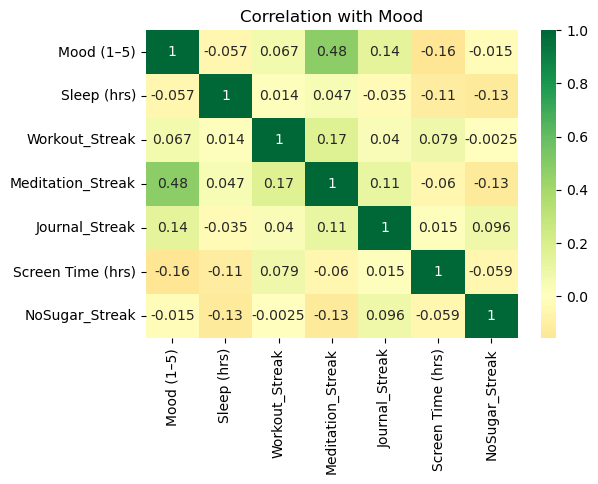

In [20]:
# Only numeric columns
num_cols = ['Mood (1–5)', 'Sleep (hrs)', 'Workout_Streak', 'Meditation_Streak', 'Journal_Streak', 'Screen Time (hrs)','NoSugar_Streak']

# Correlation matrix
corr = wkb[num_cols].corr()

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0)
plt.title("Correlation with Mood")
plt.show()

In [6]:
corr = wkb[num_cols].corr()
corr

,Mood (1–5),Sleep (hrs),Workout_Streak,Meditation_Streak,Journal_Streak,Screen Time (hrs),NoSugar_Streak
Mood (1–5),1.000000,-0.057099,0.067225,0.477628,0.140880,-0.157532,-0.014674
Sleep (hrs),-0.057099,1.000000,0.013904,0.046973,-0.035121,-0.113575,-0.130414
Workout_Streak,0.067225,0.013904,1.000000,0.165729,0.039814,0.078931,-0.002503
Meditation_Streak,0.477628,0.046973,0.165729,1.000000,0.114316,-0.059684,-0.131509
Journal_Streak,0.140880,-0.035121,0.039814,0.114316,1.000000,0.014727,0.095575
Screen Time (hrs),-0.157532,-0.113575,0.078931,-0.059684,0.014727,1.000000,-0.059265
NoSugar_Streak,-0.014674,-0.130414,-0.002503,-0.131509,0.095575,-0.059265,1.000000


_**VARIANCE IN MOOD ON Workout/ Non-Workout Days**_

<Axes: xlabel='Workout', ylabel='Mood (1–5)'>

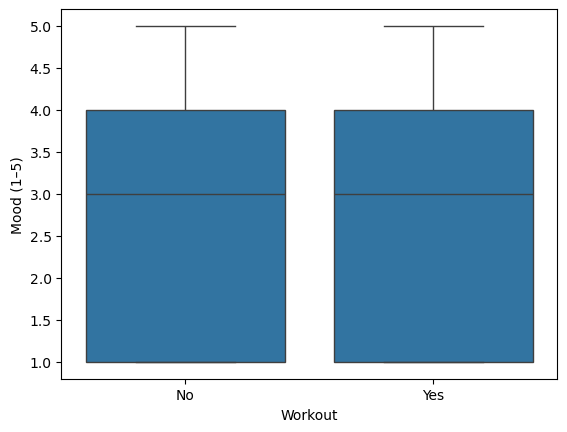

In [11]:
sns.boxplot(data = wkb,x = 'Workout', y = 'Mood (1–5)')